In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("historical_data.csv")
test_df=pd.read_csv("predict_data.csv")

In [3]:
df.head()

,Unnamed: 0,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0,3779.0
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0,4024.0
2,2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0,1781.0
3,3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0,3075.0
4,4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0,2390.0


In [4]:
## drop the index column
df=df.iloc[:,1:]

In [5]:
test_df.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 10 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   subtotal                                      197428 non-null  int64  
 5   total_onshift_dashers                         181166 non-null  float64
 6   total_busy_dashers                            181166 non-null  float64
 7   total_outstanding_orders                      181166 non-null  float64
 8   estimated_store_to_consumer_driving_duration  196902 non-null  float64
 9   total_delivery_duration_seconds               19

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   subtotal                                      54778 non-null  int64  
 4   total_onshift_dashers                         50145 non-null  float64
 5   total_busy_dashers                            50145 non-null  float64
 6   total_outstanding_orders                      50145 non-null  float64
 7   estimated_store_to_consumer_driving_duration  54767 non-null  float64
 8   delivery_id                                   54778 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [8]:
df.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds
count,196441.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,196902.000000,1.974210e+05
mean,2.978706,3530.510272,2682.331402,44.808093,41.739747,58.050065,545.358935,2.908257e+03
std,1.524867,2053.496711,1823.093688,34.526783,32.145733,52.661830,219.352902,1.922961e+04
min,1.000000,1.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,1.010000e+02
25%,2.000000,1686.000000,1400.000000,17.000000,15.000000,17.000000,382.000000,2.104000e+03
50%,3.000000,3592.000000,2200.000000,37.000000,34.000000,41.000000,544.000000,2.660000e+03
75%,4.000000,5299.000000,3395.000000,65.000000,62.000000,85.000000,702.000000,3.381000e+03
max,6.000000,6987.000000,27100.000000,171.000000,154.000000,285.000000,2088.000000,8.516859e+06


# Exploratory Data Analaysis

## Discovering the percentage of null values in each column

In [9]:
Null_dict={"NUll Percentage per column": (df.isnull().sum()/len(df))}
Null_df=pd.DataFrame(Null_dict).sort_values('NUll Percentage per column',ascending=False)
Null_df.head(50)

,NUll Percentage per column
total_onshift_dashers,0.082369
total_busy_dashers,0.082369
total_outstanding_orders,0.082369
market_id,0.004999
estimated_store_to_consumer_driving_duration,0.002664
actual_delivery_time,0.000035
total_delivery_duration_seconds,0.000035
created_at,0.000000
store_id,0.000000
subtotal,0.000000


## Check for duplicates

In [10]:
print("Number of duplicate records in the training data: " + str(df.duplicated().sum()))
print("Number of duplicate records in the test data: " + str(test_df.duplicated().sum()))

Number of duplicate records in the training data: 0
Number of duplicate records in the test data: 0


## Visualizing the numeric columns distribution

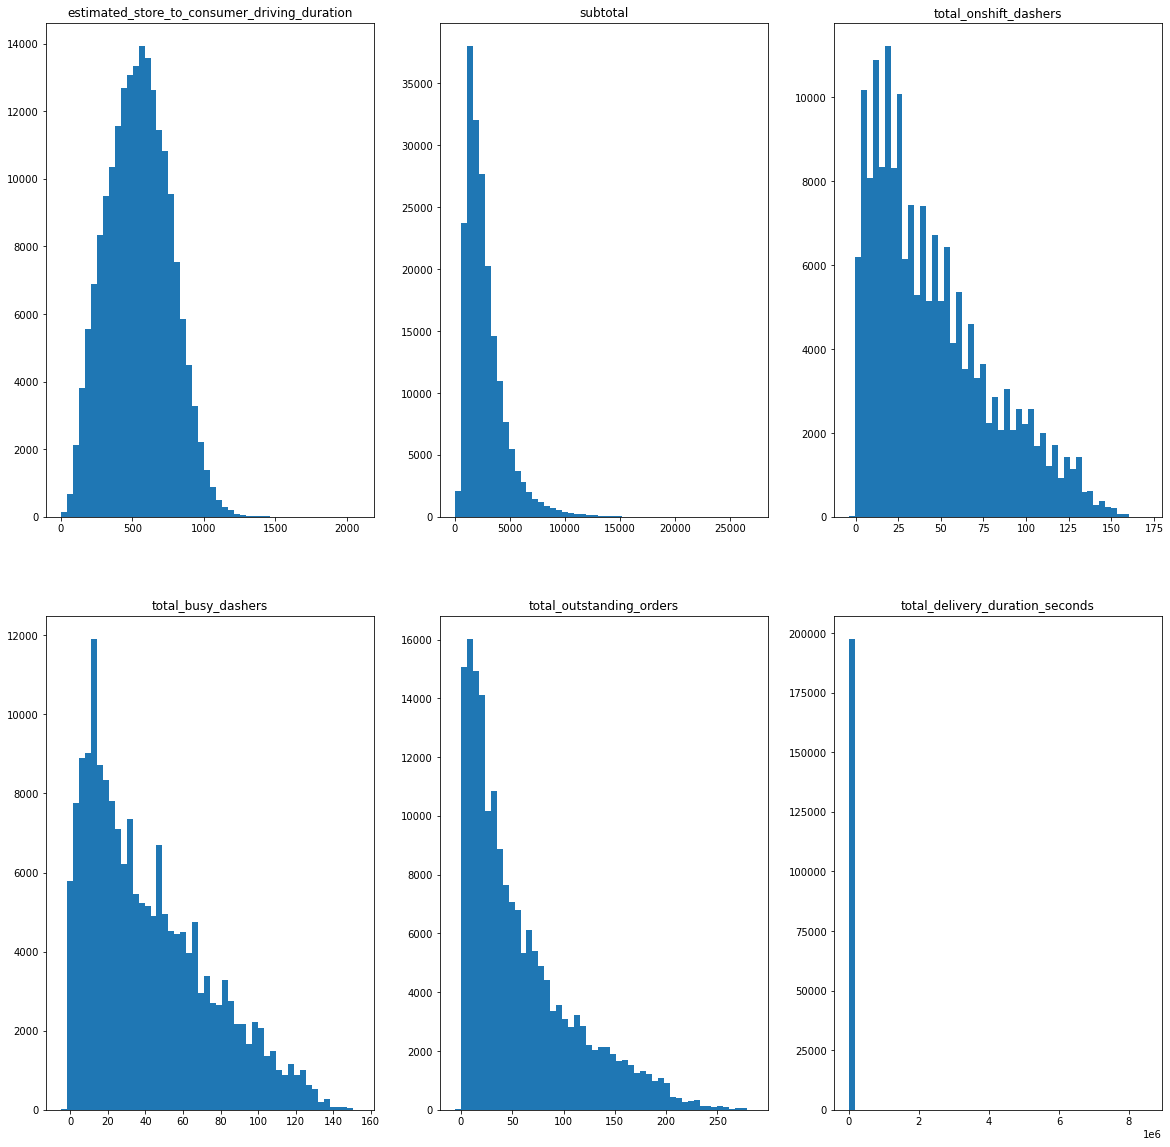

In [11]:
def plot_numerical_columns_distribution(numerical_columns):
    fig, axes = plt.subplots(2, 3, figsize=(20, 20))
    for i,col in enumerate(numerical_columns):
        axes[int(i/3)][i%3].hist(df[col],bins=50)
        axes[int(i/3)][i%3].set_title(col)
    
numerical_columns = ['estimated_store_to_consumer_driving_duration',  'subtotal','total_onshift_dashers'
                   ,'total_busy_dashers','total_outstanding_orders','total_delivery_duration_seconds']

plot_numerical_columns_distribution(numerical_columns)

## Checking for Outliers

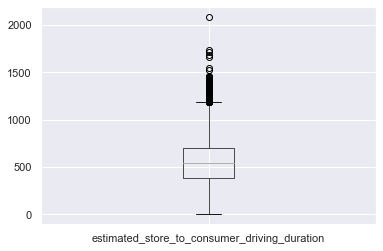

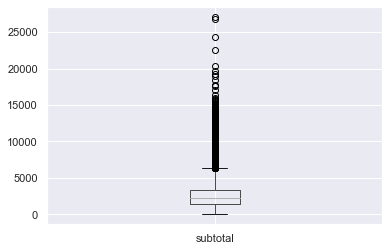

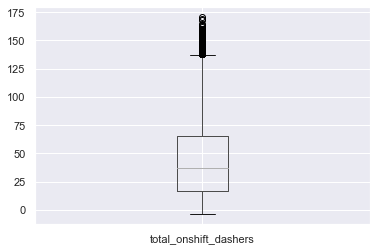

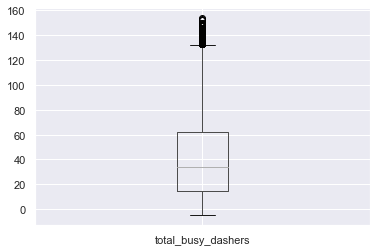

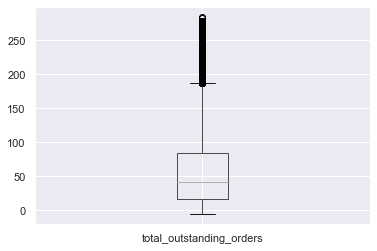

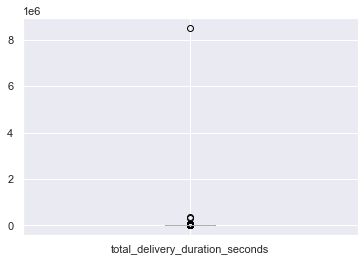

In [12]:
sns.set(rc={'figure.figsize':(6,4)})
def check_for_outliers(numerical_columns):
    for i,col in enumerate(numerical_columns):
        box_plt = df.boxplot(column=[col])
        plt.show()

numerical_columns = ['estimated_store_to_consumer_driving_duration',  'subtotal','total_onshift_dashers'
                   ,'total_busy_dashers','total_outstanding_orders','total_delivery_duration_seconds']
check_for_outliers(numerical_columns)

In [13]:
def get_number_of_outliers(col_name):
    Q3,Q1=df[col_name].quantile(0.75),df[col_name].quantile(0.25)
    IQR=Q3-Q1
    outliersCount=len(df[df[col_name]>Q3+1.5*IQR])
    print(col_name+" has " +str(outliersCount) + " outliers")
    
for col in numerical_columns:
    get_number_of_outliers(col)

estimated_store_to_consumer_driving_duration has 366 outliers
subtotal has 9054 outliers
total_onshift_dashers has 1502 outliers
total_busy_dashers has 606 outliers
total_outstanding_orders has 5301 outliers
total_delivery_duration_seconds has 6277 outliers


## Visulalizing covariance matrix

In [14]:
 df.corr()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds
market_id,1.000000,0.017301,-0.016237,0.069752,0.060488,0.063754,0.006597,-0.005784
store_id,0.017301,1.000000,-0.013370,-0.023141,-0.023245,-0.020348,0.001953,-0.000414
subtotal,-0.016237,-0.013370,1.000000,0.130831,0.125566,0.130106,0.034665,0.011200
total_onshift_dashers,0.069752,-0.023141,0.130831,1.000000,0.943789,0.936122,0.045925,0.046972
total_busy_dashers,0.060488,-0.023245,0.125566,0.943789,1.000000,0.932913,0.044504,0.060641
total_outstanding_orders,0.063754,-0.020348,0.130106,0.936122,0.932913,1.000000,0.039795,0.122294
estimated_store_to_consumer_driving_duration,0.006597,0.001953,0.034665,0.045925,0.044504,0.039795,1.000000,0.012198
total_delivery_duration_seconds,-0.005784,-0.000414,0.011200,0.046972,0.060641,0.122294,0.012198,1.000000


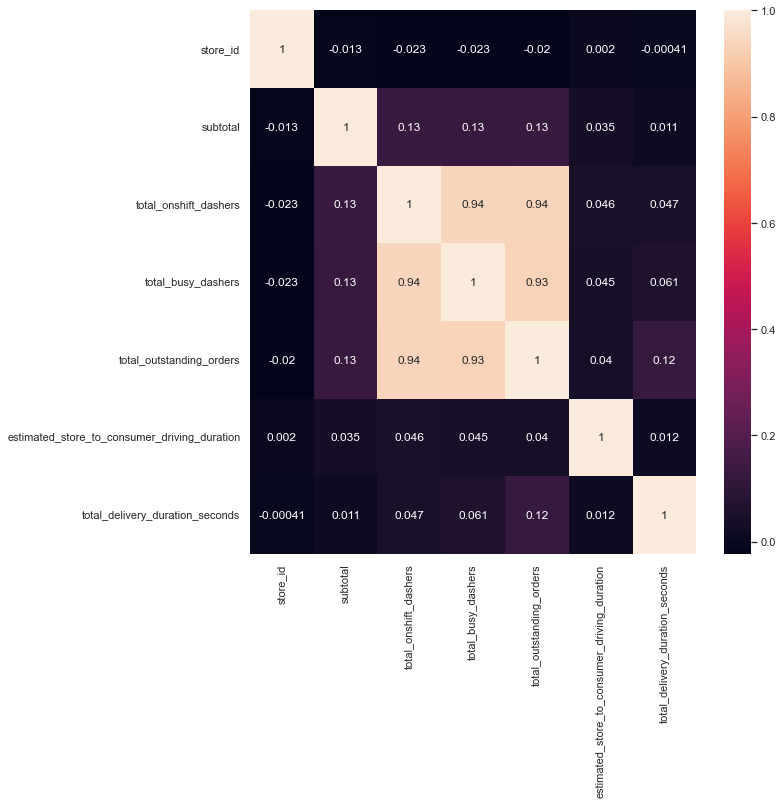

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.iloc[:,1:].corr(),annot=True); 

### we can see from the correlation matrix that the features that has the highest correlation with the target are (estimated driving time , subtotal , total outstanding orders) although they still have weak correlation 

# Preprocessing Step

In [16]:
from preprocessing import preprocessingClass as preprocess

In [17]:
preprocess=preprocess(df,test_df)

## As there are negative values in some columns as shown in the cell above , we will replace them to 0 as those columns can't contain negative values

In [18]:
preprocess.handleNegativeValues(columns=['total_onshift_dashers','total_busy_dashers','total_outstanding_orders'],
                               substitution_value=0)

## Dealing with missing values based on the columns distribution in the EDA step

In [19]:
imputation_dict={'estimated_store_to_consumer_driving_duration':'mean','total_onshift_dashers':'median',
                'total_busy_dashers':'median','total_outstanding_orders':'median','market_id':'mode'}
preprocess.imputeMissingValues(imputation_dict=imputation_dict)

## Dropping records that have missing values

In [20]:
preprocess.dropRecordsWithNullValues()

## Handling Outliers in the target column

In [21]:
preprocess.removeTargetOutliers('total_delivery_duration_seconds')

## Feature Engineering : generating useful information from the date column such as ('day','hour' ,'month') and applying one hot encoding to those date components

In [22]:
features_to_be_generated=['hour','month','day']
preprocess.generateFeaturesFromDateColumn('created_at',features_to_be_generated)

## Applying one hot encoding for Market_id column

In [23]:
## Applying one hot encoding for Market_id column
preprocess.applyOneHotEncoding(['market_id'])

## Exploratory data analysis after feature engineering (generating some new columns) 

In [24]:
#visualizing data
df=preprocess.getTrainDataframe()
test_df=preprocess.getTestDataframe()
df.head()

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds,...,x2_2,x2_3,x2_4,x2_5,x2_6,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0,3779.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0,4024.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0,1781.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0,3075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0,2390.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [25]:
test_df.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id,created_at_hour,...,x2_2,x2_3,x2_4,x2_5,x2_6,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


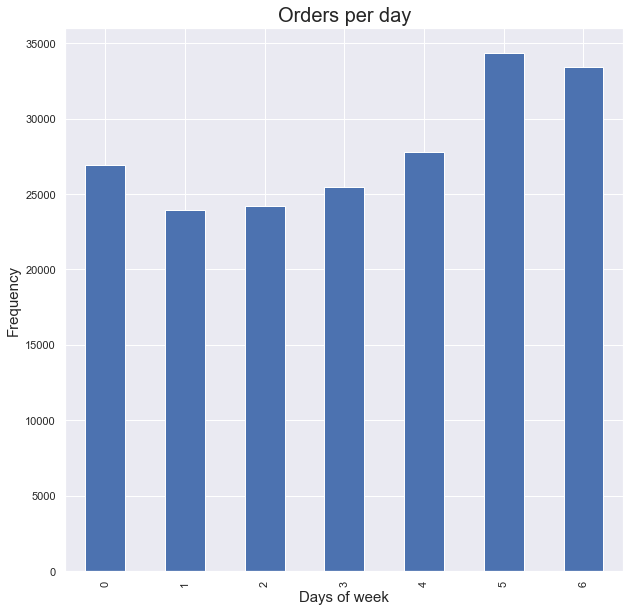

In [26]:
df.groupby('created_at_day')['created_at_day'].count().plot.bar();
plt.xlabel("Days of week",fontsize=15);
plt.ylabel("Frequency",fontsize=15);
plt.title("Orders per day",fontsize=20);

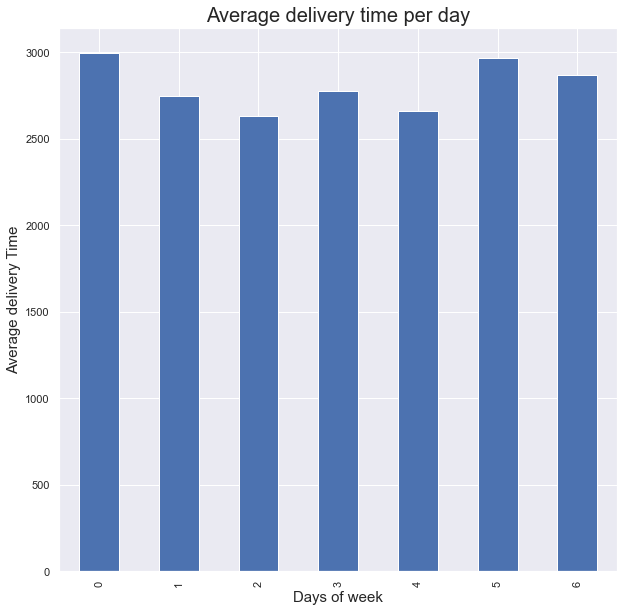

In [27]:
df.groupby('created_at_day')['total_delivery_duration_seconds'].mean().plot.bar();
plt.xlabel("Days of week",fontsize=15);
plt.ylabel("Average delivery Time",fontsize=15);
plt.title("Average delivery time per day",fontsize=20);

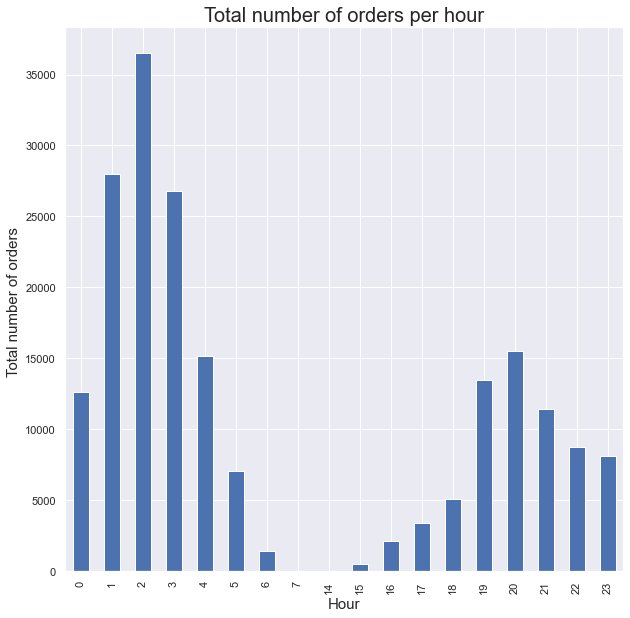

In [28]:
df.groupby('created_at_hour')['created_at_hour'].count().plot.bar();
plt.xlabel("Hour",fontsize=15);
plt.ylabel("Total number of orders ",fontsize=15);
plt.title("Total number of orders per hour",fontsize=20);

## we can see in the plot below that there are hours very busy with orders while other hours are much less busy with orders

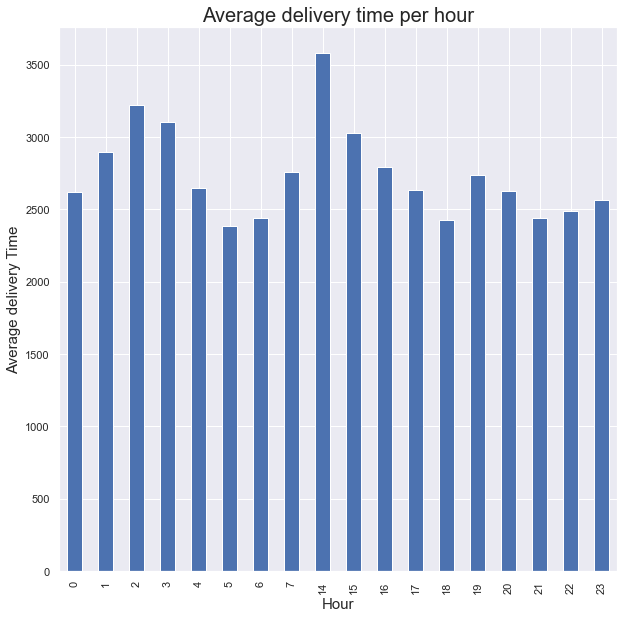

In [29]:
df.groupby('created_at_hour')['total_delivery_duration_seconds'].mean().plot.bar();
plt.xlabel("Hour",fontsize=15);
plt.ylabel("Average delivery Time",fontsize=15);
plt.title("Average delivery time per hour",fontsize=20);

## we can notice that there are some hours that has total average delivery time more than other

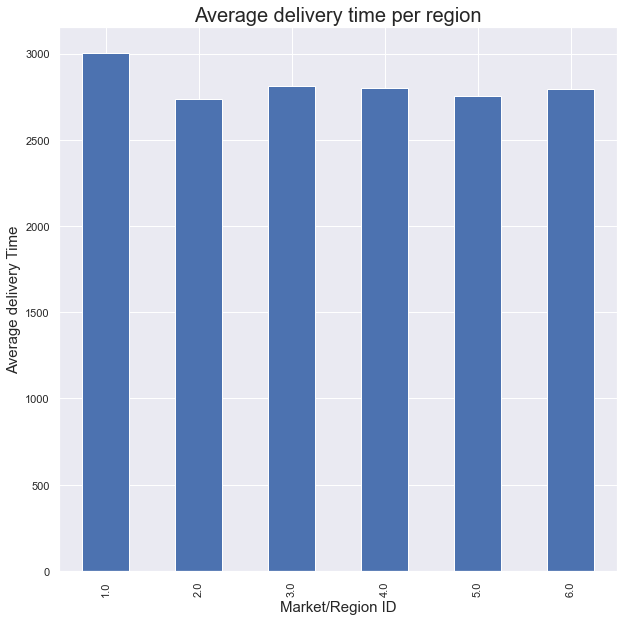

In [30]:
df.groupby('market_id')['total_delivery_duration_seconds'].mean().plot.bar();
plt.xlabel("Market/Region ID",fontsize=15);
plt.ylabel("Average delivery Time",fontsize=15);
plt.title("Average delivery time per region",fontsize=20);

## we can see that all regions has nearly the same average delivery time

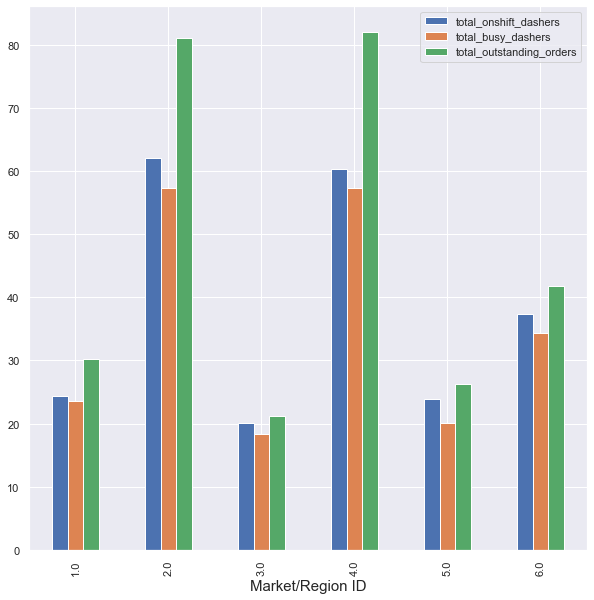

In [31]:
df.groupby('market_id')['total_onshift_dashers','total_busy_dashers','total_outstanding_orders'].mean().plot.bar(legend=True);
plt.xlabel("Market/Region ID",fontsize=15);

## we can see from the plot below that per market , 
## the average number of available drivers is slightly higher than the number of idle drivers
## also we can see that some markets has average number of orders and drivers much more than other markets as region/market (2,4)

## Dropping unneeded columns

In [32]:
train_columns_to_be_dropped=['created_at','created_at_month','created_at_day','created_at_hour','market_id','actual_delivery_time']
test_columns_to_be_dropped=['created_at','created_at_month','created_at_day','created_at_hour','market_id','delivery_id']
preprocess.dropColumns(train_columns_to_be_dropped,test_columns_to_be_dropped)

In [33]:
df=preprocess.getTrainDataframe()
test_df=preprocess.getTestDataframe()

In [34]:
X=df.drop('total_delivery_duration_seconds',axis=1)
Y=df['total_delivery_duration_seconds']

In [35]:
X.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,x0_1,x0_2,x0_3,x0_4,...,x2_2,x2_3,x2_4,x2_5,x2_6,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,1845,3441,33.0,14.0,21.0,861.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5477,1900,1.0,2.0,2.0,690.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5477,1900,1.0,0.0,0.0,690.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5477,6900,1.0,1.0,2.0,289.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5477,3900,6.0,6.0,9.0,650.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [36]:
test_df.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,x0_1,x0_2,x0_3,x0_4,...,x2_2,x2_3,x2_4,x2_5,x2_6,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,5477,7500,4.0,4.0,4.0,670.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5477,7100,4.0,1.0,1.0,446.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5477,4500,9.0,7.0,6.0,504.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,5477,1700,3.0,3.0,3.0,687.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2841,3150,4.0,4.0,4.0,528.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split the data to 80% train and 20% validation to tune the hyper parameters of the models based on the validation set

In [37]:
X_train, X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
X_test=copy.deepcopy(test_df)

## Target Encoding for store_id column

In [38]:
X_train,X_val,X_test=preprocess.applyTargetEncoding(X_train,Y_train,X_val,X_test,columns=['store_id'])

## Applying feature scaling (Standarization) for the numerical columns

In [39]:
columns_to_be_scaled = ['estimated_store_to_consumer_driving_duration',  'subtotal','total_onshift_dashers'
                   ,'total_busy_dashers','total_outstanding_orders','store_id'] 

X_train,X_val,X_test=preprocess.featureScaling(columns_to_be_scaled,X_train,X_val,X_test,option='standarization')

In [40]:
X_train.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,x0_1,x0_2,x0_3,x0_4,...,x2_2,x2_3,x2_4,x2_5,x2_6,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
142354,0.887053,-0.232447,-0.309421,-0.394392,-0.388798,0.123659,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
46366,-1.863098,-0.425058,0.534751,0.738826,0.499868,-1.232108,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
76290,-0.075618,-0.835045,-0.218974,-0.232503,-0.309805,-1.556214,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75830,1.475728,0.067476,-0.791806,-0.782924,-0.803509,2.766719,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28860,0.550026,-0.785516,-0.972700,-1.171455,-1.000990,-0.999299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling Part

In [41]:
from regression_models import regressionModels

In [42]:
regression_models=regressionModels(X_train, Y_train, X_val, Y_val)

## Linear Regression

Mean Squared Error : 662753.3338188471
Mean Absolute Error : 620.2828222469188
R2 Score : 0.3357501613471483


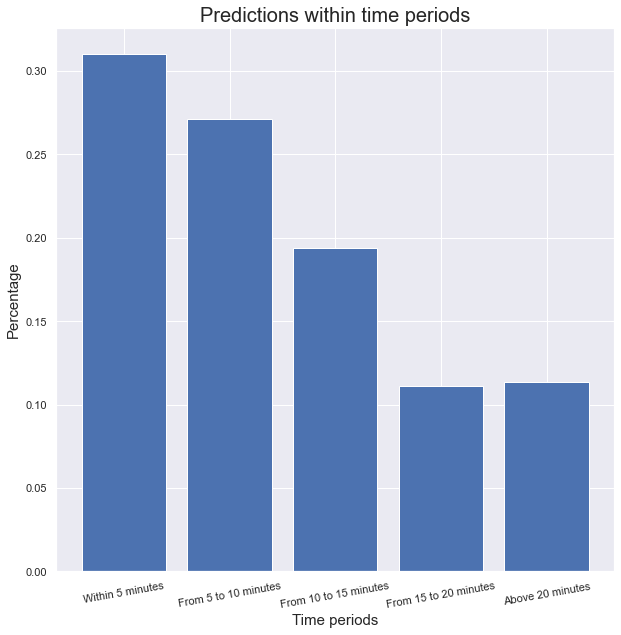

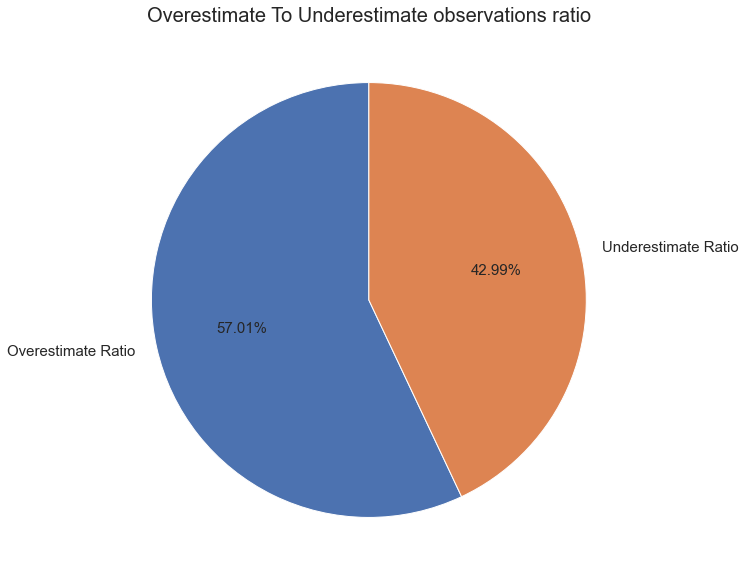

In [43]:
regression_models.linearRegression(degree=1)

## Random Forest Regressor

Mean Squared Error : 916728.1971500567
Mean Absolute Error : 742.0148483945385
R2 Score : 0.08120181978309327


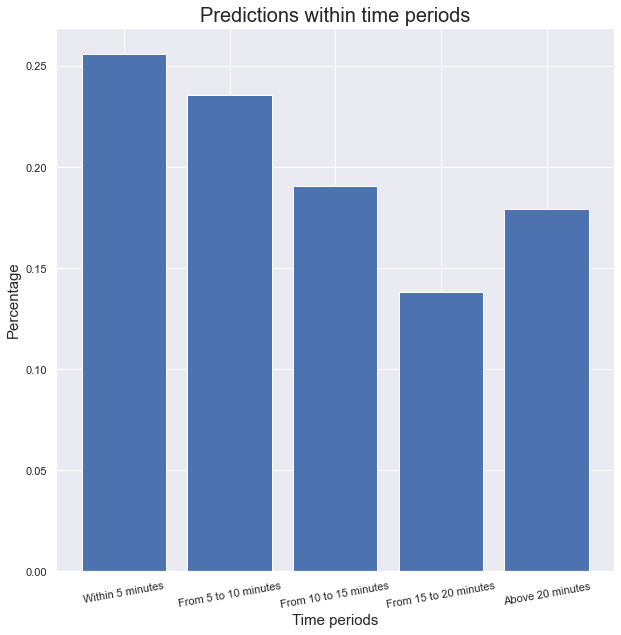

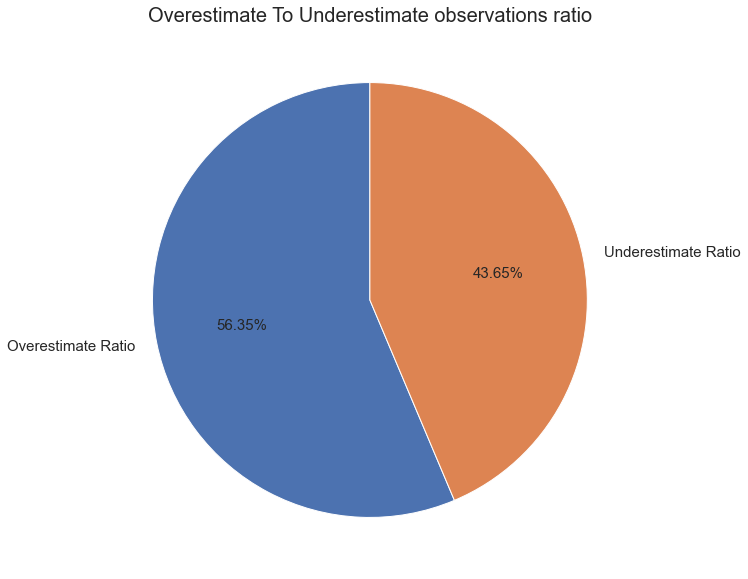

In [44]:
regression_models.randomForestRegressor(n_estimators=100,max_depth=1)

## XGBoost Regressor

[21:35:22] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error : 619968.0479532833
Mean Absolute Error : 595.4649314116283
R2 Score : 0.3786320568921431


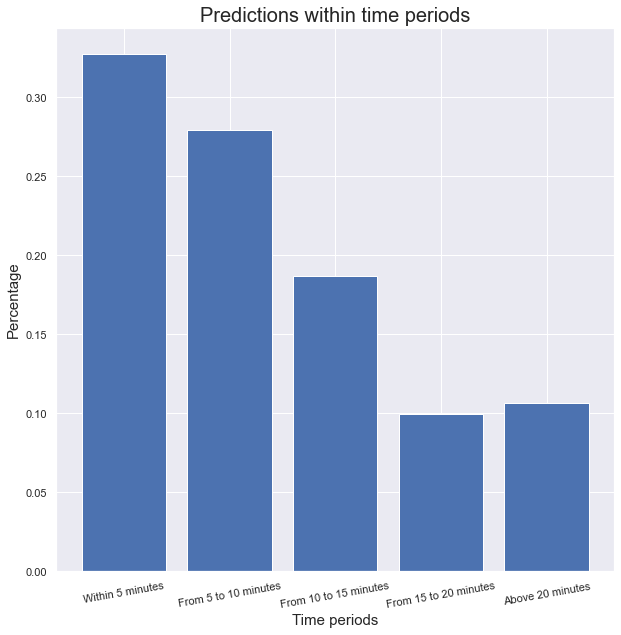

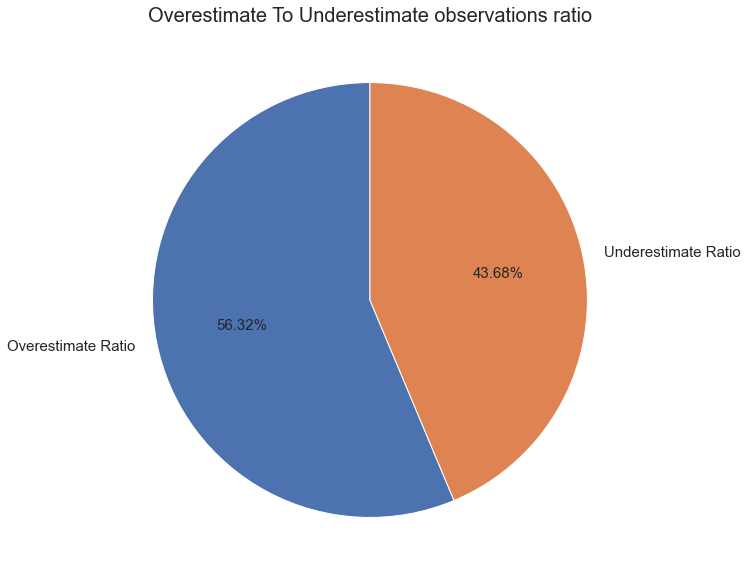

In [45]:
regression_models.XGBRegressor(n_estimators=100,max_depth=7)

## KNN Regressor

Mean Squared Error : 686060.8867589498
Mean Absolute Error : 628.1549360822638
R2 Score : 0.31238997967797877


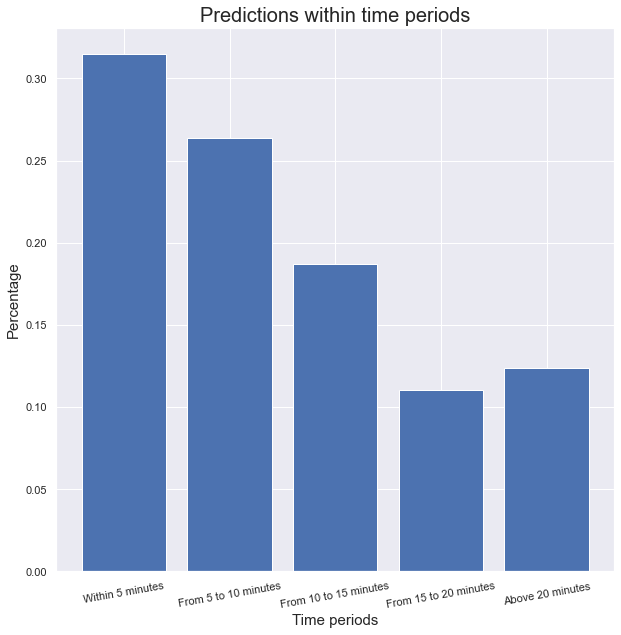

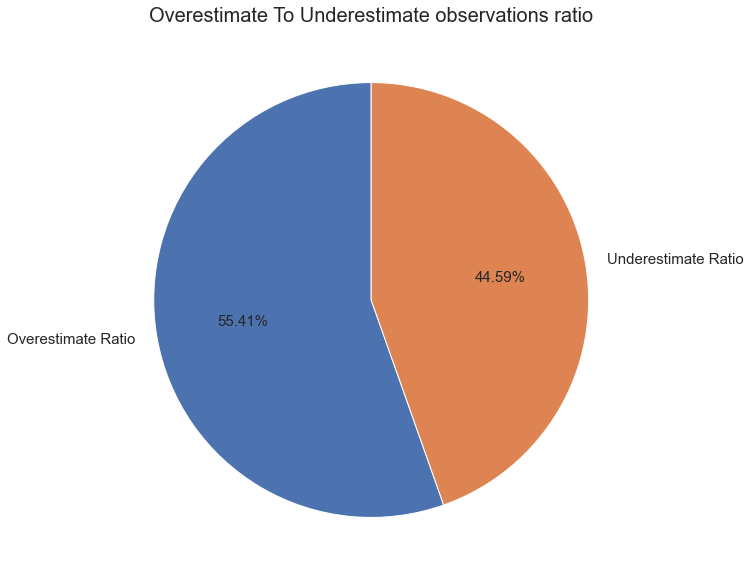

In [46]:
regression_models.KNNRegressor(n_neighbors=10)

## Decision Tree Regressor

Mean Squared Error : 771294.2512595616
Mean Absolute Error : 670.8385223572086
R2 Score : 0.22696415723640317


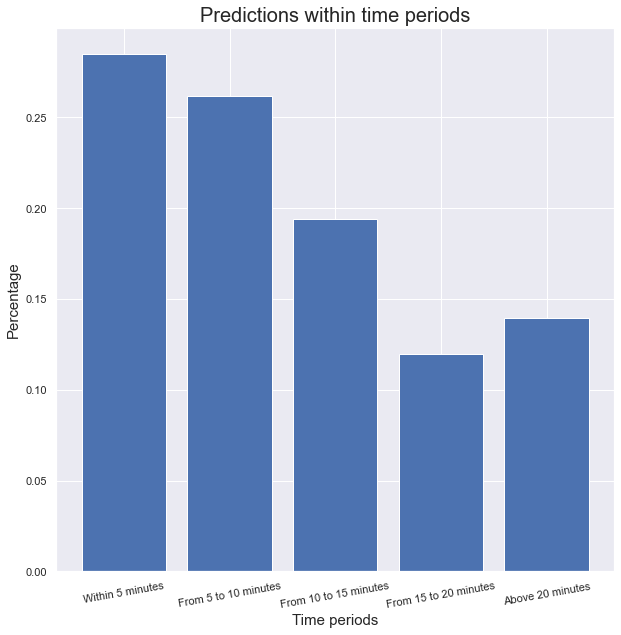

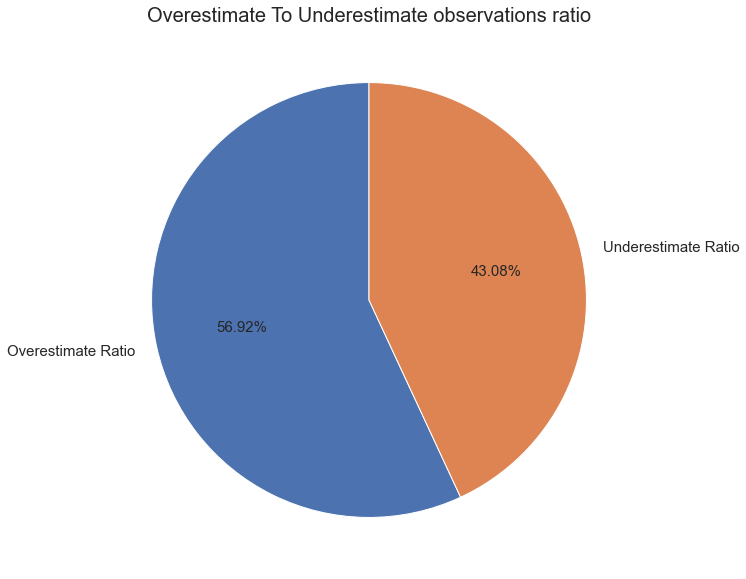

In [47]:
regression_models.DecisionTreeRegressor(max_depth=7)

## ElasticNet Model

Mean Squared Error : 662912.5238739288
Mean Absolute Error : 620.3370816861002
R2 Score : 0.33559061183904715


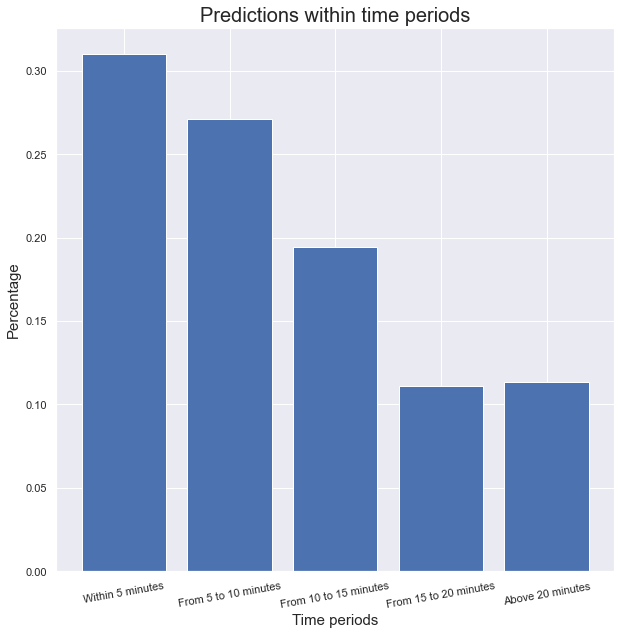

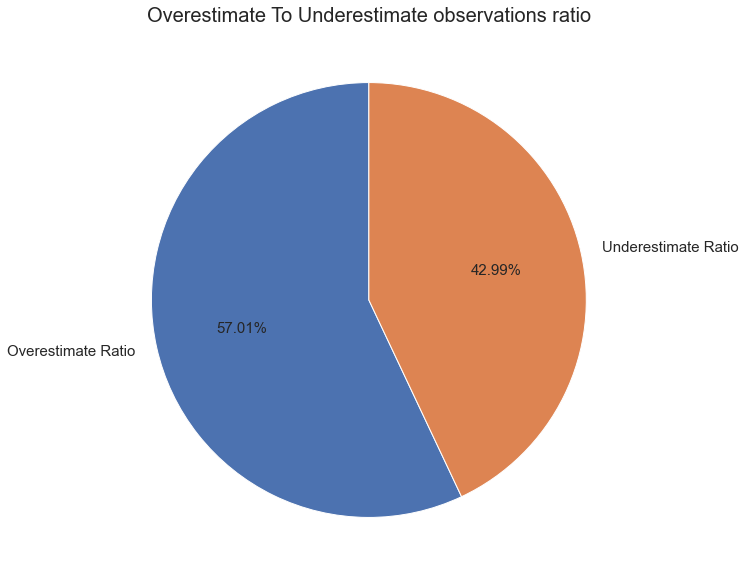

In [48]:
regression_models.ElasticNet(l1_ratio=1,alpha=0.1)

## Neural Network

Epoch 1/50
2450/2450 [==============================] - 3s 939us/step - loss: 1127632.1250 - val_loss: 684376.1875
Epoch 2/50
2450/2450 [==============================] - 2s 985us/step - loss: 630621.2500 - val_loss: 656062.8750
Epoch 3/50
2450/2450 [==============================] - 2s 1ms/step - loss: 617776.3125 - val_loss: 649736.8125
Epoch 4/50
2450/2450 [==============================] - 2s 959us/step - loss: 611054.0000 - val_loss: 647332.7500
Epoch 5/50
2450/2450 [==============================] - 2s 911us/step - loss: 605763.0000 - val_loss: 641388.3125
Epoch 6/50
2450/2450 [==============================] - 2s 992us/step - loss: 601545.3750 - val_loss: 637363.0625
Epoch 7/50
2450/2450 [==============================] - 2s 976us/step - loss: 598130.0625 - val_loss: 635720.8125
Epoch 8/50
2450/2450 [==============================] - 2s 976us/step - loss: 595355.3125 - val_loss: 638040.9375
Epoch 9/50
2450/2450 [==============================] - 2s 964us/step - loss: 592769.1875

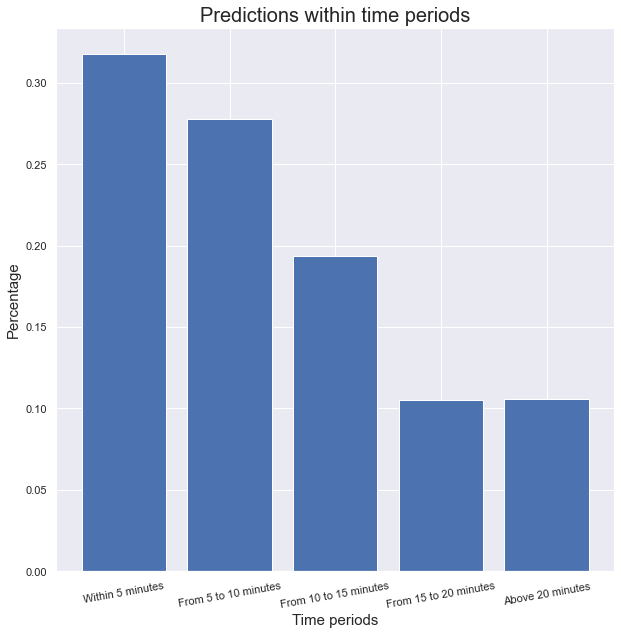

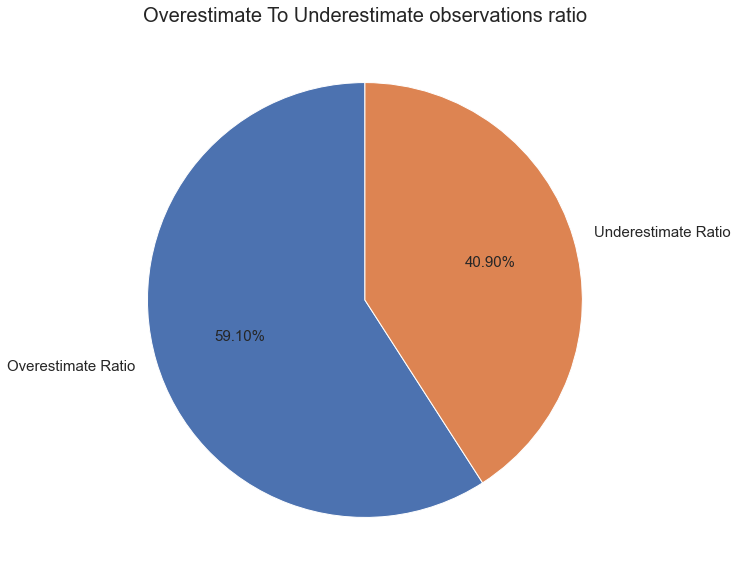

In [49]:
regression_models.NeuralNetworkRegressor(input_shape=35,loss='mean_squared_error',optimizer='adam',file_path="toy_prediction_NN.h5")

### We can see that the model that performs the best compared to the others are Neural network and XGBoost regressor 

## Saving our predictions for the best model (NN model) on the test file

In [51]:
import keras
NN_model=keras.models.load_model("toy_prediction_NN.h5")
Y_pred_test = NN_model.predict(X_test)


1712/1712 [==============================] - 1s 404us/step


In [52]:
test_df=pd.read_csv("predict_data.csv") # we will read the test file again as we dropped few columns from it during preprocessing
test_df['Predictions']=Y_pred_test
test_df.to_csv("prediction_file.csv")